# Airline Analysis

In this project, you'll imagine that you work for a travel agency and need to know the ins and outs of airline prices for your clients. You want to make sure that you can find the best deal for your client and help them to understand how airline prices change based on different factors.

You decide to look into your favorite airline. The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

In this project, you'll explore a dataset for the first time and get to know each of these features. Keep in mind that there's no one right way to address each of these questions. The goal is simply to explore and get to know the data using whatever methods come to mind.

You will be working in this file. Note that there is the file **Airline Analysis_Solution.ipynb** that contains the solution code for this project. We highly recommend that you complete the project on your own without checking the solution, but feel free to take a look if you get stuck or if you want to compare answers when you're done.

In order to get the plots to appear correctly in the notebook, you'll need to show and then clear each plot before creating the next one using the following code:

```py
plt.show() # Show the plot
plt.clf() # Clear the plot
```

Clearing the plot will not erase the plot from view, it will just create a new space for the following graphic.

## Univariate Analysis

1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math


In [3]:
## Read in Data
flight = pd.read_csv("flight.csv")
flight.head()

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
0,792,172,0,No,Yes,Yes,Sunday,Yes,Yes,338.820,1571.02,1
1,3163,214,0,No,Yes,Yes,Sunday,No,Yes,472.655,1663.70,6
2,1832,212,0,No,Yes,No,Friday,No,Yes,351.960,1429.86,3
3,925,213,0,No,Yes,Yes,Saturday,No,Yes,387.835,1558.76,2
4,967,217,0,Yes,Yes,Yes,Monday,No,No,374.735,1245.58,2


In [4]:
## Task 1
flight.coach_price.describe()

count    129780.000000
mean        376.585253
std          67.744274
min          44.415000
25%         331.445000
50%         380.560000
75%         426.676250
max         593.635000
Name: coach_price, dtype: float64

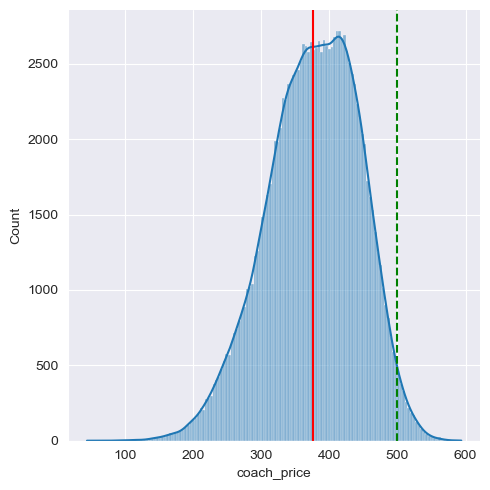

In [17]:
sns.set_style('darkgrid')
sns.displot(flight.coach_price, kde=True)
plt.axvline(x = flight.coach_price.mean(), color = 'r')
plt.axvline(x = 500, color = 'g', linestyle = '--')
plt.show()

2. Now visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 dollar ticket seem more reasonable than before?

In [18]:
flight[flight.hours == 8].coach_price.describe()

count    2634.000000
mean      431.834377
std        64.083280
min       170.770000
25%       390.266250
50%       437.115000
75%       480.043750
max       593.635000
Name: coach_price, dtype: float64

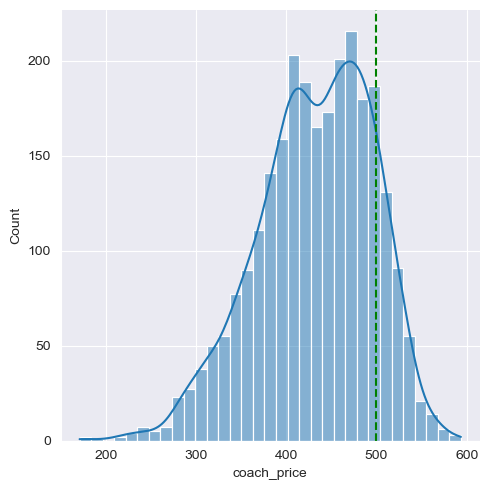

In [19]:
## Task 2
sns.displot(flight[flight.hours == 8].coach_price, kde = True)
plt.axvline(x = 500, linestyle = '--',color = 'g')
plt.show()

3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

In [20]:
## Task 3
flight.delay.describe()

count    129780.000000
mean         13.162845
std          41.941680
min           0.000000
25%           9.000000
50%          10.000000
75%          13.000000
max        1560.000000
Name: delay, dtype: float64

In [21]:
long = flight.query('delay > 100').delay

In [22]:
short = flight.query('delay < 100').delay

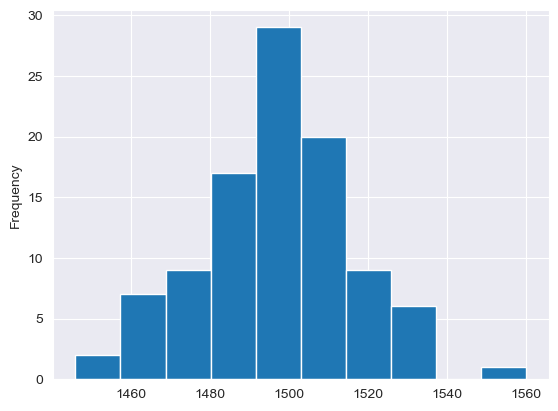

In [23]:
long.plot.hist()
plt.show()

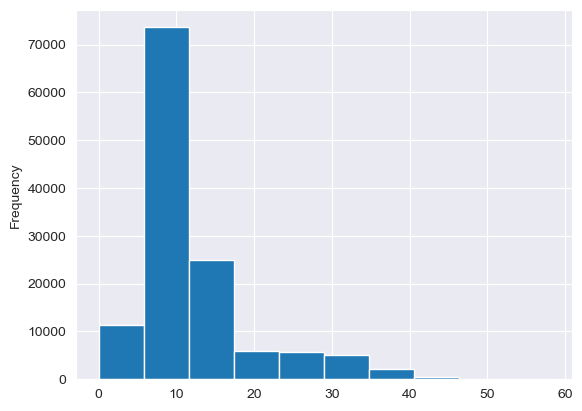

In [24]:
short.plot.hist()
plt.show()

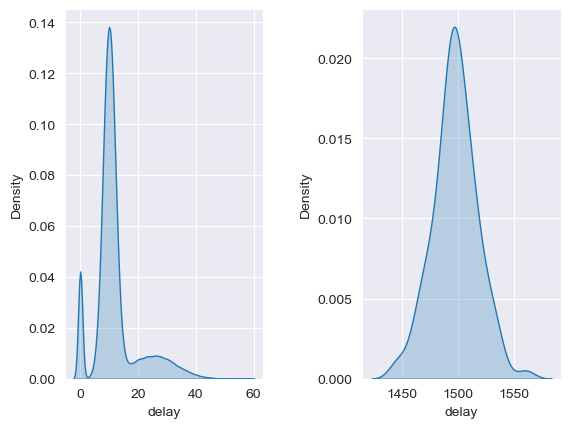

In [25]:
fig, (ax0,ax1) = plt.subplots(nrows = 1, ncols = 2)
sns.kdeplot(short, ax = ax0, fill=True)
sns.kdeplot(long, ax = ax1, fill=True)
plt.subplots_adjust(wspace = 0.5)
plt.show()

## Bivariate Analysis

4. Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

In [26]:
n = flight.shape[0] *0.05

In [27]:
## Task 4
flightsp = flight.sample(int(n))

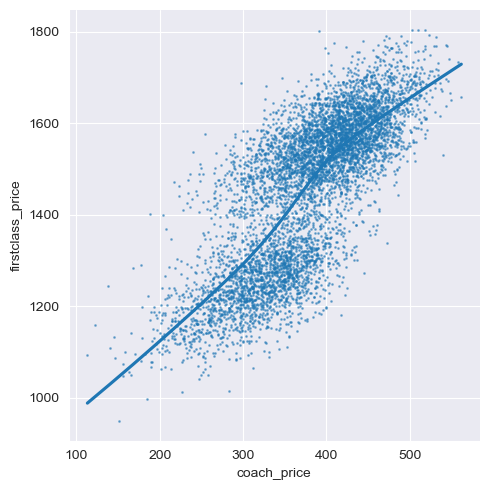

In [28]:
sns.lmplot(data = flightsp, x = 'coach_price', y = 'firstclass_price', scatter_kws={'alpha': 0.5, 's':1}, lowess=True)
plt.show()

5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

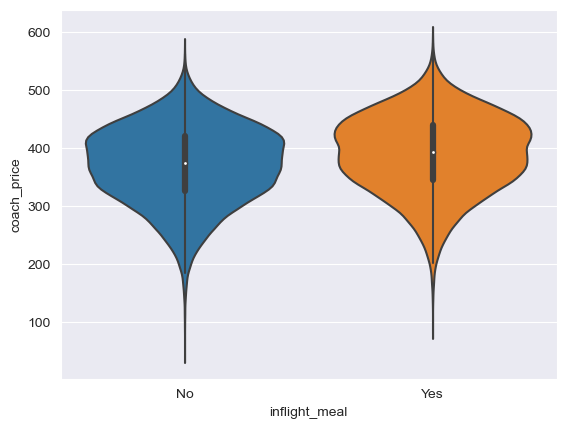

The significant difference between groups is True
the difference between groups is 19.313521297194143


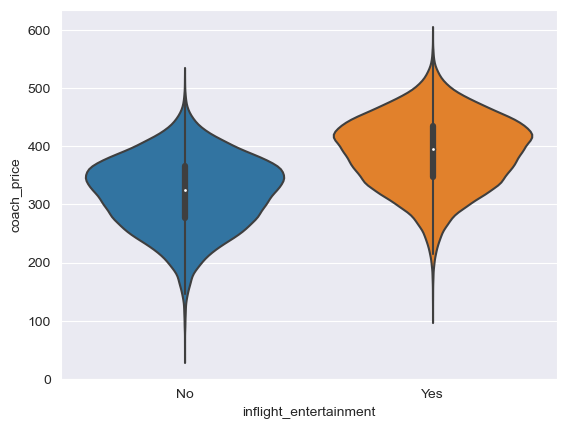

The significant difference between groups is True
the difference between groups is 70.06515472357268


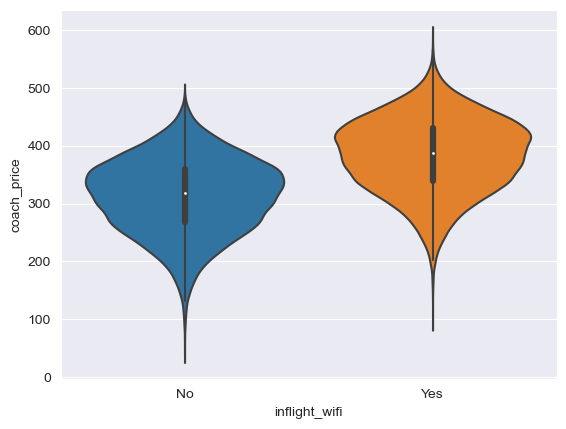

The significant difference between groups is True
the difference between groups is 70.46574876513739


In [44]:
## Task 5
import scipy.stats as stats
lst = ['inflight_meal', 'inflight_entertainment', 'inflight_wifi']
for i in lst:
    sns.violinplot(x = i, y = 'coach_price', data = flight, order=['No', 'Yes'])
    plt.show()
    plt.clf()
    t_t = stats.ttest_ind(flight[flight[i]=='Yes'].coach_price,flight[flight[i]=='No'].coach_price)
    print(f"The significant difference between groups is {t_t.pvalue < 0.01}")
    dif = flight[flight[i]=='Yes'].coach_price.mean() - flight[flight[i]=='No'].coach_price.mean()
    print(f"the difference between groups is {dif}")

6. How does the number of passengers change in relation to the length of flights?

In [47]:
import statsmodels.formula.api as smf

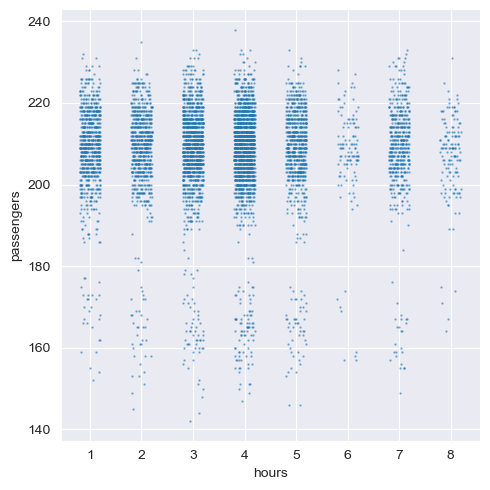

In [55]:
## Task 6

sns.lmplot(data = flightsp, x = 'hours', y = 'passengers', scatter_kws={'alpha': 0.5, 's':0.5}, x_jitter = 0.2 ,fit_reg = False)
plt.show()

## Multivariate Analysis

7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

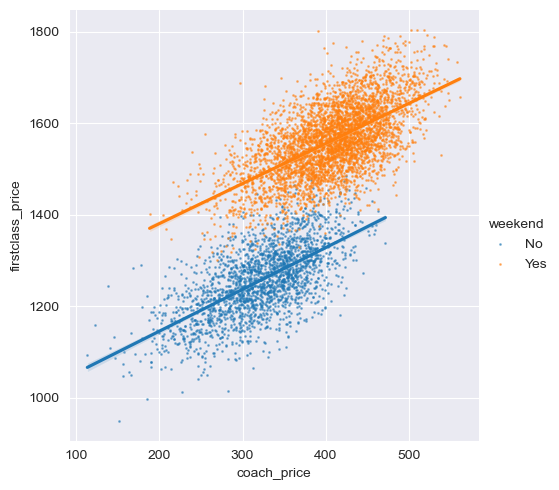

In [58]:
## Task 7
sns.lmplot(data = flightsp, x = 'coach_price', y = 'firstclass_price', hue = 'weekend',scatter_kws = {'alpha':0.5,'s':1})
plt.show()


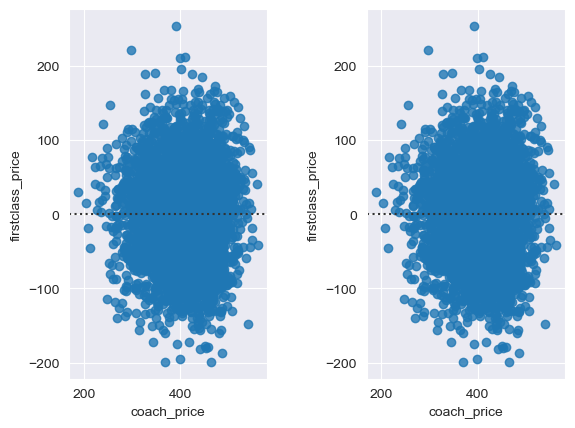

In [66]:
# to confirm the relationship
ax0  = plt.subplot(1,2,1)
ax1  = plt.subplot(1,2,2)
sns.residplot(data = flightsp[flightsp.weekend == 'Yes'], x = 'coach_price', y = 'firstclass_price',ax = ax0)
sns.residplot(data = flightsp[flightsp.weekend == 'Yes'], x = 'coach_price', y = 'firstclass_price',ax = ax1)
plt.subplots_adjust(wspace = 0.5)
plt.show()

8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

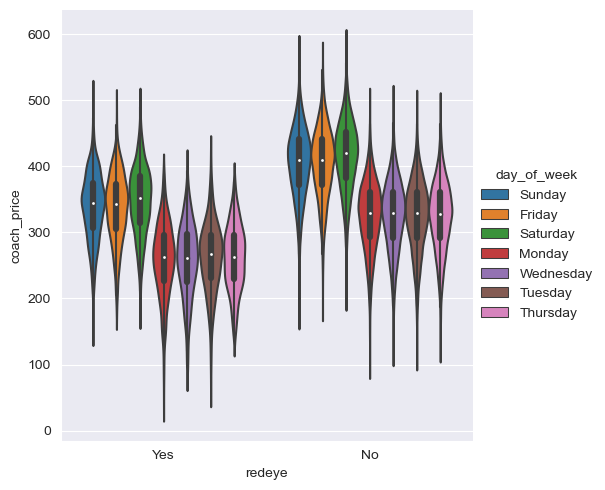

In [69]:
## Task 8
sns.catplot(data = flight, x = 'redeye', y = 'coach_price', hue = 'day_of_week', kind = 'violin')
plt.show()


